In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import numpy as np


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
#https://review.udacity.com/#!/rubrics/1507/view

## Data exploration

In [3]:
seattle_calendar = pd.read_csv('Seattle\calendar.csv')
seattle_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [4]:
seattle_calendar.shape

(1393570, 4)

In [5]:
seattle_listings = pd.read_csv('Seattle\listings.csv')

#unnecessary_columns = ['listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 'experiences_offered', 'neighborhood_overview', 'notes', 'transit', 'thumbnail_url',
#       'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url',
#       'host_name']

#seattle_listings = seattle_listings.drop(unnecessary_columns, axis = 1)
seattle_listings.shape

(3818, 92)

In [6]:
seattle_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [87]:
seattle_listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

# With neighbourhood generally sets the highest price per night?

### Data preparation

In [7]:

seattle_listings['price']

0        $85.00
1       $150.00
2       $975.00
3       $100.00
4       $450.00
         ...   
3813    $359.00
3814     $79.00
3815     $93.00
3816     $99.00
3817     $87.00
Name: price, Length: 3818, dtype: object

In [8]:
#Format price
seattle_listings['price'] = seattle_listings.price.str[1:].str.replace(",","").astype(float)

In [9]:
#How many nans in price and neighbourhood?
def perc_missing_values(df, columnname):
    return 100 *np.sum(df[columnname].isnull())/df[columnname].shape[0]
                        
#print("neighbourhood missing 100 *np.sum(seattle_listings['price'].isnull())/seattle_listings['price'].shape[0]


In [10]:
print("price-column: {} %".format(perc_missing_values(seattle_listings, 'price')))

price-column: 0.0 %


In [11]:
print("neighbourhood-column: {} %".format(perc_missing_values(seattle_listings, 'neighbourhood')))

neighbourhood-column: 10.895756940806706 %


In [12]:
# In my opinion it's not a good idea to take the mode to replace the nans in neighbourhood.
# That's why I drop the nans out of the dataframe

seattle_listings = seattle_listings.dropna(subset = ['neighbourhood'])

### Evaluation

In [13]:
# mean prices in the neighbourhood

neighbourhood = seattle_listings.groupby(['neighbourhood'])['price'].mean().reset_index()
neighbourhood = neighbourhood.sort_values('price', ascending=False).reset_index(drop = True)
#neighbourhood["name"] = neighbourhood["property_type"] + " in " + neighbourhood["neighbourhood"] 
neighbourhood.head()



,neighbourhood,price
0,Fairmount Park,370.000000
1,Industrial District,245.000000
2,Portage Bay,241.428571
3,Westlake,197.000000
4,Alki,196.652174


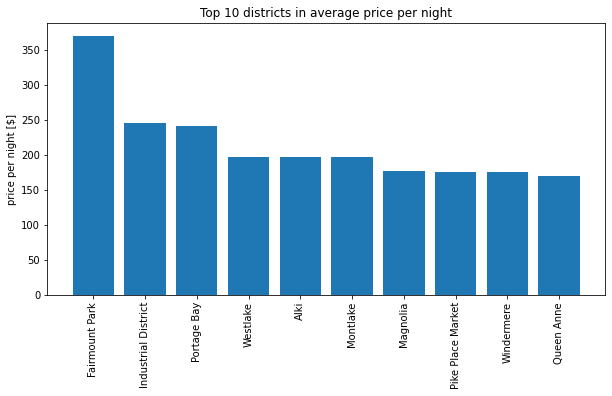

In [14]:
#plot the
plt.figure(figsize = (10,5))
plt.bar(x = neighbourhood.neighbourhood.head(10), height = neighbourhood.price.head(10))
plt.ylabel("price per night [$]")
plt.title("Top 10 districts in average price per night")
plt.xticks(rotation = 90);

# What is the booking rate in those districts?

### Data preparation

In [15]:
relevant_districts = neighbourhood.neighbourhood.head(10)

In [16]:
#How to get the booking rate?
# The seattle_calendar datframe includes the availbale column. So there we can get the percentage of booked accomdations
# price and date column need to be changed

In [17]:
seattle_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [18]:
# price and date column need to be changed

In [19]:

seattle_calendar['price'] = seattle_calendar.price.str[1:].str.replace(",","").astype(float)

In [20]:
seattle_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [21]:
seattle_calendar.dtypes

listing_id      int64
date           object
available      object
price         float64
dtype: object

In [22]:
seattle_calendar['date'] = pd.to_datetime(seattle_calendar.date)

In [23]:
seattle_calendar.dtypes

listing_id             int64
date          datetime64[ns]
available             object
price                float64
dtype: object

In [24]:
# Merging the neighbourhood to the calendar with the ids
df_nb = seattle_calendar.merge(seattle_listings[['id', 'neighbourhood']], left_on = 'listing_id', right_on = 'id')

In [25]:
seattle_calendar.dtypes

listing_id             int64
date          datetime64[ns]
available             object
price                float64
dtype: object

In [26]:
#groubpy neighbourhood
nb_av = df_nb.groupby(['neighbourhood', 'available']).count()['listing_id']#.reset_index().rename(columns={"listing_id": "counts"})

#As Fairmount Park as no false values we need to create a new index
new_index = pd.MultiIndex.from_product([relevant_districts, df_nb['available'].unique().tolist()])
nb_av = nb_av.reindex(new_index).reset_index(drop = False).rename(columns ={"level_1":"available", "listing_id":"counts"})

In [27]:
nb_av = nb_av.fillna(0)

In [28]:
booking_rate = []
for nb in relevant_districts:
    available = nb_av[(nb_av.neighbourhood == nb) & (nb_av.available == 't')]["counts"].values
    not_available = nb_av[(nb_av.neighbourhood == nb) & (nb_av.available == 'f')]["counts"].values
    booking_rate.extend(not_available /(available + not_available))
#booking_rate

## Evaluation

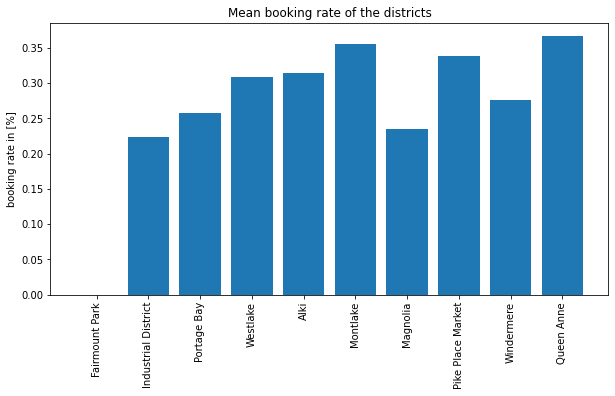

In [29]:
#plot the
plt.figure(figsize = (10,5))
plt.bar(x = relevant_districts, height = booking_rate)
plt.ylabel("booking rate in [%]")
plt.title("Mean booking rate of the districts")
plt.xticks(rotation = 90);

# Which neighbourhood gains the highest sales?

In [30]:
seattle_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [31]:
# It seems like all booked accomodations don't have a price anymore.
# So we need to interpolate from the last free date.
# First we need to look if there is accomodation which is fully booked

In [32]:
all_listings = seattle_calendar['listing_id'].unique().tolist()
listings_with_free = seattle_calendar[seattle_calendar['available']=="t"]['listing_id'].unique().tolist()
listings_missing_price = list(set(all_listings) - set(listings_with_free))

In [33]:
len(all_listings)

3818

In [34]:
len(listings_missing_price)

95

In [35]:
df_pr = seattle_calendar.merge(seattle_listings[['id', 'price']], left_on = 'listing_id', right_on = 'id', suffixes=("","_listed"))

In [36]:
df_pr.head()

,listing_id,date,available,price,id,price_listed
0,241032,2016-01-04,t,85.0,241032,85.0
1,241032,2016-01-05,t,85.0,241032,85.0
2,241032,2016-01-06,f,NaN,241032,85.0
3,241032,2016-01-07,f,NaN,241032,85.0
4,241032,2016-01-08,f,NaN,241032,85.0


In [37]:
df_pr = df_pr[df_pr.listing_id.isin(listings_missing_price)].drop(['price', 'id'], axis = 1)

In [38]:
df_pr = df_pr.rename(columns={'price_listed':'price'})
df_pr.head()

,listing_id,date,available,price
48180,4550099,2016-01-04,f,295.0
48181,4550099,2016-01-05,f,295.0
48182,4550099,2016-01-06,f,295.0
48183,4550099,2016-01-07,f,295.0
48184,4550099,2016-01-08,f,295.0


In [39]:
#For those with available times we interpolate
df_pr_2 = seattle_calendar[seattle_calendar.listing_id.isin(listings_with_free)]
df_pr_2 = seattle_calendar.set_index(['listing_id','date'])
df_pr_2 = df_pr_2.ffill().reset_index(drop = False)
df_pr_2.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
2,241032,2016-01-06,f,85.0
3,241032,2016-01-07,f,85.0
4,241032,2016-01-08,f,85.0


In [40]:
#join those two dataframes again
print(df_pr.shape[0], df_pr_2.shape[0])
df_pr = df_pr.append(df_pr_2)

31755 1393570


In [41]:
df_pr.head()


,listing_id,date,available,price
48180,4550099,2016-01-04,f,295.0
48181,4550099,2016-01-05,f,295.0
48182,4550099,2016-01-06,f,295.0
48183,4550099,2016-01-07,f,295.0
48184,4550099,2016-01-08,f,295.0


In [42]:
#So now as we have filled all prices we only have a look on the booked accomodations
df_pr = df_pr[df_pr["available"] == "f"]

In [43]:
sales = df_pr.groupby('listing_id').sum()['price'].reset_index(drop = False).rename(columns={"price":"sales"})
sales.head()

,listing_id,sales
0,3335,5320.0
1,5682,2927.0
2,7369,28170.0
3,9460,36662.0
4,9531,24281.0


In [44]:
sales = sales.merge(seattle_listings[['id', 'property_type', 'neighbourhood']], left_on = 'listing_id', right_on = 'id')

In [45]:
sales_nb = sales.groupby('neighbourhood').mean()['sales'].reset_index(drop = False)
sales_nb = sales_nb.sort_values('sales', ascending=False).reset_index(drop = True)
sales_nb.head()

,neighbourhood,sales
0,Montlake,39943.500000
1,South Beacon Hill,37003.500000
2,Pinehurst,35519.500000
3,Madison Park,34829.833333
4,North Beach/Blue Ridge,34577.900000


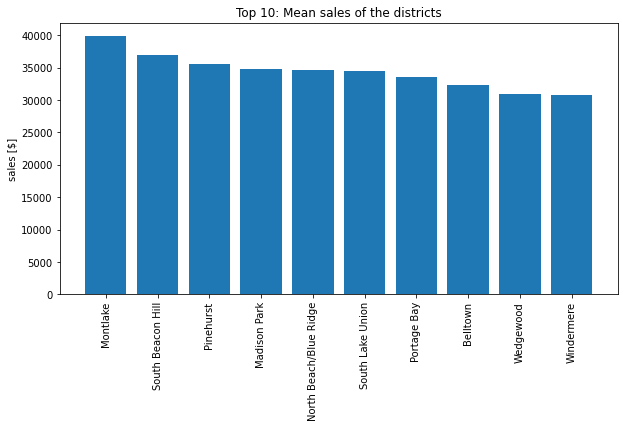

In [46]:
plt.figure(figsize = (10,5))
plt.bar(x = sales_nb.neighbourhood.head(10), height = sales_nb.sales.head(10))
plt.ylabel("sales [$]")
plt.title("Top 10: Mean sales of the districts")
plt.xticks(rotation = 90);

In [47]:
# sales_pt = sales[sales.neighbourhood== 'Montlake'].groupby('property_type').mean()['sales'].reset_index(drop = False)
# sales_pt.head()

In [48]:
# plt.figure(figsize = (10,5))
# plt.bar(x = sales_pt.property_type, height = sales_pt.sales)
# plt.ylabel("sales [$]")
# plt.title("sales per property type in Montlake")
# plt.xticks(rotation = 90);

In [49]:
# In Montlake Treehouses gain in average the highest sales.

In [50]:
# Let's have a look on the accomodation in Montlake with the highest sales

In [51]:
sales_Ml = sales[(sales.neighbourhood== 'Montlake')].reset_index()

In [52]:
sales_Ml.iloc[sales_Ml['sales'].idxmax()]

index                 579
listing_id        2350464
sales              313900
id                2350464
property_type       House
neighbourhood    Montlake
Name: 2, dtype: object

In [53]:
highest_sales_id = sales_Ml.iloc[sales_Ml['sales'].idxmax()]['id']

# Is it possible to predict the sales?

### Data preparation

In [54]:
seattle_listings.iloc[:,70:80].columns

Index(['availability_90', 'availability_365', 'calendar_last_scraped',
       'number_of_reviews', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin'],
      dtype='object')

In [55]:
seattle_listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [56]:
#Columns which can be transformed to either categorical, bool or  numerical columns
relevant_columns = ['id', 'host_since', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_neighbourhood',
                   'host_listings_count', 'host_total_listings_count', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 
                    'neighbourhood_cleansed', 'city', 'zipcode', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'price',
                    'guests_included', 'minimum_nights', 'maximum_nights',
                    'availability_30', 'availability_60', 'availability_90', 'availability_365',
                   'calendar_last_scraped', 'number_of_reviews', 'first_review',
                   'last_review', 'review_scores_rating', 'review_scores_accuracy',
                   'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
                   'review_scores_value', 'instant_bookable', 'cancellation_policy', 'require_guest_profile_picture', 'require_guest_phone_verification',
                   'calculated_host_listings_count', 'reviews_per_month']

In [57]:
df_rel = seattle_listings[relevant_columns]

In [58]:
#merge the sales column to the dataframe
df_sales = df_rel.merge(sales[['id', 'sales']], left_on = 'id', right_on = 'id')

In [59]:
df_sales.dtypes

id                                    int64
host_since                           object
host_response_time                   object
host_response_rate                   object
host_acceptance_rate                 object
host_is_superhost                    object
host_neighbourhood                   object
host_listings_count                 float64
host_total_listings_count           float64
host_has_profile_pic                 object
host_identity_verified               object
neighbourhood                        object
neighbourhood_cleansed               object
city                                 object
zipcode                              object
latitude                            float64
longitude                           float64
property_type                        object
room_type                            object
accommodates                          int64
bathrooms                           float64
bedrooms                            float64
beds                            

In [60]:
#transform to float
df_sales['host_response_rate'] = df_sales['host_response_rate'].str[:-1].astype(float)
df_sales['host_acceptance_rate'] = df_sales['host_acceptance_rate'].str[:-1].astype(float)

In [ ]:
#divide the columns in groups to work easier with them

In [61]:
bool_columns = ['host_is_superhost', 'host_identity_verified', 'host_has_profile_pic', 'instant_bookable', 'require_guest_profile_picture', 'require_guest_phone_verification']

In [62]:
date_columns = ["host_since", "calendar_last_scraped","last_review", "first_review", "first_review"]

In [63]:
cat_columns = ['host_response_time', 'host_neighbourhood', 'neighbourhood', 
               'neighbourhood_cleansed', 'city', 'zipcode', 'property_type', 'room_type',
               'bed_type', 'cancellation_policy']

In [64]:
float_columns = df_sales.select_dtypes(include=['float']).columns.tolist()


In [66]:
for col in bool_columns:
    df_sales[col] = df_sales[col].str.replace("t", "1").replace("f", "0").astype(float)

In [67]:
df_sales = df_sales.drop(date_columns, axis = 1)

In [68]:
for col in cat_columns:
    df_sales = pd.concat([df_sales.drop(col, axis=1), pd.get_dummies(df_sales[col], prefix=col, prefix_sep ="_", drop_first=True)], axis=1)
#

In [69]:
fill_mean = lambda col: col.fillna(col.mean())

final_df = df_sales.apply(fill_mean, axis = 0)

In [70]:
final_df.describe().loc['count'].min()

2821.0

In [71]:
final_df.shape

(2821, 348)

In [72]:
r2 = []

### Modelling

In [73]:
# First modell with all columns

In [74]:
def lm_r2_score(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=.30, random_state=42)
    lm_model = LinearRegression(normalize=True)

    lm_model.fit(X_train, y_train)


    y_test_preds = lm_model.predict(X_test)


    r2_test =  r2_score(y_test, y_test_preds)
    
    
    return r2_test

In [75]:
X = final_df.drop(['sales'], axis = 1)
y = final_df['sales']

lm_r2_score(X, y)

-1.263890156961015e+27

In [76]:
# As expected r2_score is very high negative so we have a overfitting here.

In [77]:
# But which columns should we drop to not have an overfitting?
# Let's have a look on the correlation of each columns and start with most correlating columns. And the create a loop
# adding the next column and see how the r2_score reacts.

In [78]:
final_df.corr()['sales'].abs().sort_values(ascending = False).head(21)

sales                                1.000000
availability_365                     0.661236
availability_90                      0.403803
availability_60                      0.357287
price                                0.347717
availability_30                      0.288932
bedrooms                             0.221082
accommodates                         0.204309
room_type_Private room               0.180210
beds                                 0.172295
bathrooms                            0.166309
reviews_per_month                    0.150298
guests_included                      0.148739
number_of_reviews                    0.148158
host_neighbourhood_Belltown          0.133288
host_response_time_within an hour    0.119523
neighbourhood_cleansed_Belltown      0.108853
id                                   0.100761
neighbourhood_Belltown               0.100596
calculated_host_listings_count       0.080404
bed_type_Couch                       0.077079
Name: sales, dtype: float64

In [79]:
r2 = []
for i in range(50):
    corr_columns = final_df.corr()['sales'].abs().sort_values(ascending = False).head(i+5).index
    X = final_df[corr_columns]
    X = X.drop(['sales'], axis = 1)

    y = final_df['sales']
    #print(i)
    r2.append(lm_r2_score(X, y))

(0.0, 0.65)

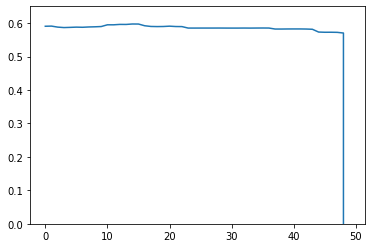

In [80]:
plt.plot(r2)
plt.ylim(0,0.65)

In [81]:
#The highest r2_score we with 19 most correlating columns
print(r2.index(max(r2)) + 5, ":", max(r2))

19 : 0.5972456331063384


In [82]:
# r2_score of about 0.6 is ok. So let's imagine we have a simliar house in Montlake like that with the highest sales.

In [83]:
corr_columns = final_df.corr()['sales'].abs().sort_values(ascending = False).head(19).index

In [84]:
pred_df = final_df[corr_columns]

In [85]:
pred_df[pred_df['id'] == highest_sales_id ]

,sales,availability_365,availability_90,availability_60,price,availability_30,bedrooms,accommodates,room_type_Private room,beds,bathrooms,reviews_per_month,guests_included,number_of_reviews,host_neighbourhood_Belltown,host_response_time_within an hour,neighbourhood_cleansed_Belltown,id,neighbourhood_Belltown
1902,313900.0,0,0,0,750.0,0,4.0,9,0,5.0,2.5,0.77,6,17,0,0,0,2350464,0


In [86]:
X = final_df[corr_columns]
X = X.drop(['sales'], axis = 1)

y = final_df['sales']
lm_r2_score(X, y)

0.5972456331063384